In [ ]:
import os
print(os.listdir(("/content/drive/My Drive/Face Mask/data")))

['without_mask', 'with_mask']


In [ ]:
import tensorflow as tf
import keras
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
]

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import PIL
import matplotlib.pyplot as plt
import json
from IPython.display import Image as disp_image 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
img_height = 256
img_width = 256
channels = 3
batch_size = 32
epochs = 15

In [ ]:
train_data_dir = '/content/drive/My Drive/Face Mask/data'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

print(train_generator.class_indices)

Found 5789 images belonging to 2 classes.
Found 1446 images belonging to 2 classes.
{'with_mask': 0, 'without_mask': 1}


In [ ]:
model = tf.keras.applications.MobileNetV2(weights = "imagenet", include_top=False, 
input_shape = (img_height, img_width, channels),classifier_activation="softmax")

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
for layer in model.layers[:-5]:
    layer.trainable = False

top_model = Sequential()
top_model.add(model)
top_model.add(Flatten())
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

In [ ]:
print(model.summary())

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 128, 128, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 128, 128, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 128, 128, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [ ]:
print(top_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 8, 8, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 81920)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               20971776  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 23,230,017
Trainable params: 21,692,033
Non-trainable params: 1,537,984
_________________________________________________________________
None


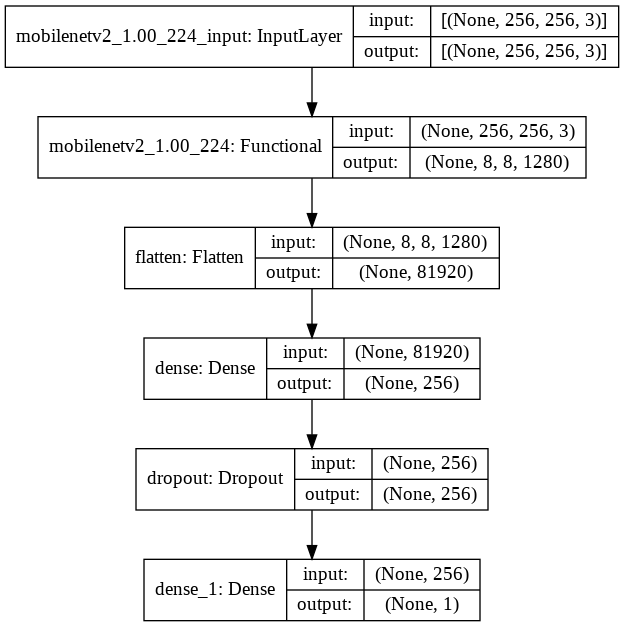

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(top_model, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)

In [ ]:
top_model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(learning_rate=1e-4, decay=1e-6),
                  metrics=METRICS)
# optimizer = tf.keras.optimizers.Adam(0.001)

history = top_model.fit(
          train_generator,
          steps_per_epoch=train_generator.n // batch_size,
          epochs=epochs,
          validation_data=validation_generator,
          validation_steps=validation_generator.n // batch_size)

Epoch 1/15
180/180 [==============================] - 1643s 9s/step - loss: 0.1905 - accuracy: 0.9684 - precision: 0.9698 - recall: 0.9705 - auc: 0.9878 - val_loss: 0.3381 - val_accuracy: 0.9639 - val_precision: 0.9360 - val_recall: 1.0000 - val_auc: 0.9800
Epoch 2/15
180/180 [==============================] - 416s 2s/step - loss: 0.0509 - accuracy: 0.9901 - precision: 0.9905 - recall: 0.9908 - auc: 0.9959 - val_loss: 0.4202 - val_accuracy: 0.9708 - val_precision: 0.9487 - val_recall: 0.9987 - val_auc: 0.9780
Epoch 3/15
180/180 [==============================] - 421s 2s/step - loss: 0.0442 - accuracy: 0.9922 - precision: 0.9928 - recall: 0.9925 - auc: 0.9967 - val_loss: 0.8695 - val_accuracy: 0.9625 - val_precision: 0.9337 - val_recall: 1.0000 - val_auc: 0.9676
Epoch 4/15
180/180 [==============================] - 425s 2s/step - loss: 0.0318 - accuracy: 0.9939 - precision: 0.9944 - recall: 0.9941 - auc: 0.9974 - val_loss: 0.4665 - val_accuracy: 0.9799 - val_precision: 0.9669 - val_reca

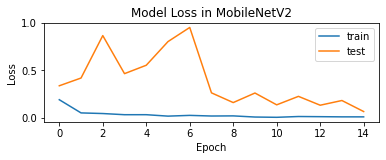

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.subplot(211)
pyplot.title('Model Loss in MobileNetV2')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
Xception_train_loss = history.history['loss']
Xception_test_loss = history.history['val_loss']
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.savefig('/content/drive/My Drive/MobileNetV2.png')
pyplot.legend()
pyplot.show()

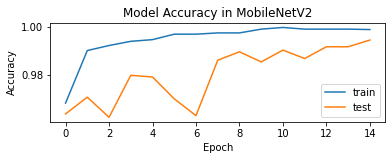

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.subplot(211)
pyplot.title('Model Accuracy in MobileNetV2')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
Xception_train_accuracy = history.history['accuracy']
Xception_test_accuracy= history.history['val_accuracy']
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.savefig('/content/drive/My Drive/MobileNetV2.png')
pyplot.legend()
pyplot.show()

In [ ]:
score = top_model.evaluate(validation_generator)
print(" Total: ", len(validation_generator.filenames))
f1_score = (2*score[2]*score[3])/(score[2]+score[3])
print("\n","Loss: ", score[0],"\n", "Accuracy: ", score[1],"\n", "Precision: ",score[2], "\n","Recall: ",score[3],"\n","F1-Score: ",f1_score,"\n","AUC: ",score[4])

46/46 [==============================] - 68s 1s/step - loss: 0.1614 - accuracy: 0.9903 - precision: 0.9934 - recall: 0.9882 - auc: 0.9919
 Total:  1446

 Loss:  0.16141507029533386 
 Accuracy:  0.9903181195259094 
 Precision:  0.9934297204017639 
 Recall:  0.9882352948188782 
 F1-Score:  0.9908256996844282 
 AUC:  0.9918612241744995


In [ ]:
print('\nEpoch No.  Train Loss  Train Accuracy      Val Loss      Val Accuracy')
Epochs = epochs
for i in range(epochs):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history.history['loss'][i], history.history['accuracy'][i], history.history['val_loss'][i], history.history['val_accuracy'][i]))


Epoch No.  Train Loss  Train Accuracy      Val Loss      Val Accuracy
       1   0.190495 	   0.968386 	   0.338134 	   0.963889
       2   0.050863 	   0.990099 	   0.420157 	   0.970833
       3   0.044237 	   0.992183 	   0.869510 	   0.962500
       4   0.031845 	   0.993920 	   0.466473 	   0.979861
       5   0.031953 	   0.994615 	   0.555398 	   0.979167
       6   0.016752 	   0.996873 	   0.805857 	   0.970139
       7   0.024731 	   0.996873 	   0.955508 	   0.963194
       8   0.017993 	   0.997395 	   0.263263 	   0.986111
       9   0.019360 	   0.997395 	   0.160329 	   0.989583
      10   0.007200 	   0.998958 	   0.261405 	   0.985417
      11   0.004301 	   0.999653 	   0.136322 	   0.990278
      12   0.012717 	   0.998958 	   0.226060 	   0.986806
      13   0.010974 	   0.998958 	   0.132319 	   0.991667
      14   0.009095 	   0.998958 	   0.182115 	   0.991667
      15   0.009000 	   0.998784 	   0.065315 	   0.994444


In [ ]:
top_model.save('model.h5')

In [ ]:
history = top_model.fit(train_generator, validation_data = validation_generator, epochs=1, batch_size=32, verbose=1)

181/181 [==============================] - 415s 2s/step - loss: 0.0881 - true_positives: 3040.0000 - true_negatives: 2707.0000 - false_positives: 19.0000 - false_negatives: 23.0000 - val_loss: 0.1640 - val_true_positives: 758.0000 - val_true_negatives: 678.0000 - val_false_positives: 3.0000 - val_false_negatives: 7.0000


In [ ]:
score = top_model.evaluate(train_generator)
print(" Total: ", len(train_generator.filenames))
# f1_score = (2*score[2]*score[3])/(score[2]+score[3])
print('\t','\t','\t','******In Train Data***','\n')
print("\n","Loss: ", score[0],"\n", "TP: ", score[1],"\n", "TN: ",score[2], "\n","FP: ",score[3],"\n","FN: ",score[4])

181/181 [==============================] - 296s 2s/step - loss: 0.0160 - true_positives: 3058.0000 - true_negatives: 2720.0000 - false_positives: 6.0000 - false_negatives: 5.0000
 Total:  5789
	 	 	 ******In Train Data*** 


 Loss:  0.015957048162817955 
 TP:  3058.0 
 TN:  2720.0 
 FP:  6.0 
 FN:  5.0


In [ ]:
score = top_model.evaluate(validation_generator)
print(" Total: ", len(validation_generator.filenames))
# f1_score = (2*score[2]*score[3])/(score[2]+score[3])
print('\t','\t','\t','******In Test Data***','\n')
print("\n","Loss: ", score[0],"\n", "TP: ", score[1],"\n", "TN: ",score[2], "\n","FP: ",score[3],"\n","FN: ",score[4])

46/46 [==============================] - 71s 2s/step - loss: 0.2231 - true_positives: 758.0000 - true_negatives: 675.0000 - false_positives: 6.0000 - false_negatives: 7.0000
 Total:  1446
	 	 	 ******In Test Data*** 


 Loss:  0.22312718629837036 
 TP:  758.0 
 TN:  675.0 
 FP:  6.0 
 FN:  7.0


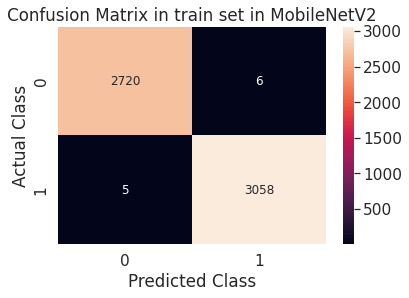

In [ ]:
import matplotlib.pyplot as pyplot
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


array = [[2720,6],
         [5,3058]]

df_cm = pd.DataFrame(array, range(2), range(2))

sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt = 'g') # font size
pyplot.title('Confusion Matrix in train set in MobileNetV2')
pyplot.ylabel('Actual Class')
pyplot.xlabel('Predicted Class')
pyplot.savefig('/content/drive/My Drive/MobileNetV2.png')
pyplot.show()

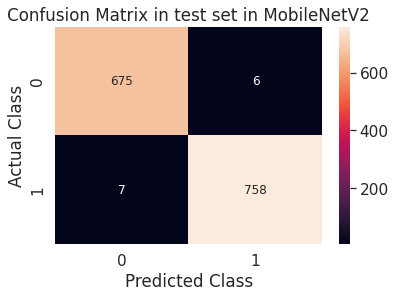

In [ ]:
import matplotlib.pyplot as pyplot
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


array = [[675,6],
         [7,758]]

df_cm = pd.DataFrame(array, range(2), range(2))

sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt = 'g') # font size
pyplot.title('Confusion Matrix in test set in MobileNetV2')
pyplot.ylabel('Actual Class')
pyplot.xlabel('Predicted Class')
pyplot.savefig('/content/drive/My Drive/ConfusionMatrix_MobileNetV2_test.png')
pyplot.show()

with Mask


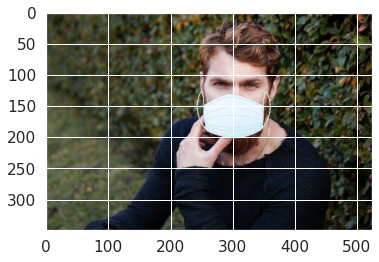

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
img=mpimg.imread('/content/drive/My Drive/Face Mask/data/with_mask/with_mask_1.jpg')
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/Face Mask/data/with_mask/with_mask_1.jpg', target_size = (256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = top_model.predict(test_image)
train_generator.class_indices

if result[0][0] < 0.5:
  print("with Mask")
  out = ('probability of being with mask case'.format(result[0][0]))
else:
  print("without Mask")
  out = ('probability of being without mask case')
dic = {0:'with mask', 1:'without mask'}
# print(result[0][0])
# plt.title(out+"\n Actual case : "+ dic.get(result[0][0])) 
imgplot = plt.imshow(img)

without Mask


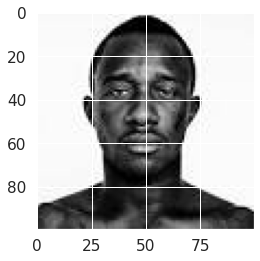

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
img=mpimg.imread('/content/drive/My Drive/Face Mask/data/without_mask/with_mask_1.jpg')
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/Face Mask/data/without_mask/without_mask_1.jpg', target_size = (256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = top_model.predict(test_image)
train_generator.class_indices

if result[0][0] < 0.5:
  print("with Mask")
  out = ('probability of being with mask case'.format(result[0][0]))
else:
  print("without Mask")
  out = ('probability of being without mask case')
dic = {0:'with mask', 1:'without mask'}
# print(result[0][0])
# plt.title(out+"\n Actual case : "+ dic.get(result[0][0])) 
imgplot = plt.imshow(img)

with Mask


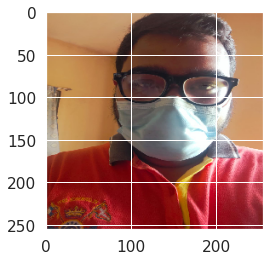

In [ ]:
top_model.save('model.h5')
model = load_model('model.h5')
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# dimensions of our images
img_width, img_height = 256, 256

# load the model we saved
model = load_model('model.h5')
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# predicting images
img = image.load_img('with_mask.jpg', target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
if classes[0][0] < 0.5:
  print("with Mask")
  out = ('probability of being with mask case'.format(result[0][0]))
else:
  print("without Mask")
  out = ('probability of being without mask case')
imgplot = plt.imshow(img)

without Mask


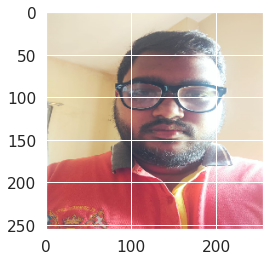

In [ ]:
top_model.save('model.h5')
model = load_model('model.h5')
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# dimensions of our images
img_width, img_height = 256, 256

# load the model we saved
model = load_model('model.h5')
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# predicting images
img = image.load_img('without_mask.jpg', target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
if classes[0][0] < 0.5:
  print("with Mask")
  out = ('probability of being with mask case'.format(result[0][0]))
else:
  print("without Mask")
  out = ('probability of being without mask case')
imgplot = plt.imshow(img)